# Streak images check

Let's assess the impact of using a reduced ROI only of the image. 

The point is that in the other analysis the profile maximum is at 10^7 while it is 10^6 only for the beam tests (due to the reduced ROI ?)

In [1]:
%run ../../PhD-utils/AWAKE-toolbox.py

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import scipy.io as sio

Version 0.1
Please report bugs to eugenio.senes@cern.ch
Use at your own risk.


In [2]:
print_pdf = True

In [3]:
scopePath = './Photodiode-on-LeCroy18GHz'
imPath = './LaserOnStreak+photodiode/Gain40_slit20um_1ns_lecroy_corrected'

In [4]:
# wanna load ?
data = pnd.read_pickle('Lecroy-dataFrame.pkl')

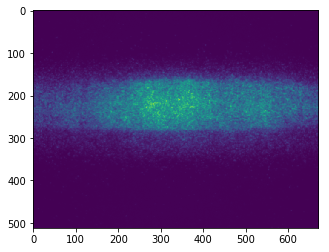

In [5]:
im = data['Streak_image'].iloc[10]
dk = data['Streak_image'].iloc[0]
plt.imshow(im)


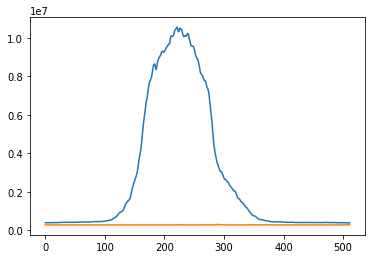

In [6]:
plt.plot(np.sum(im, axis=1))
plt.plot(np.sum(dk, axis=1))

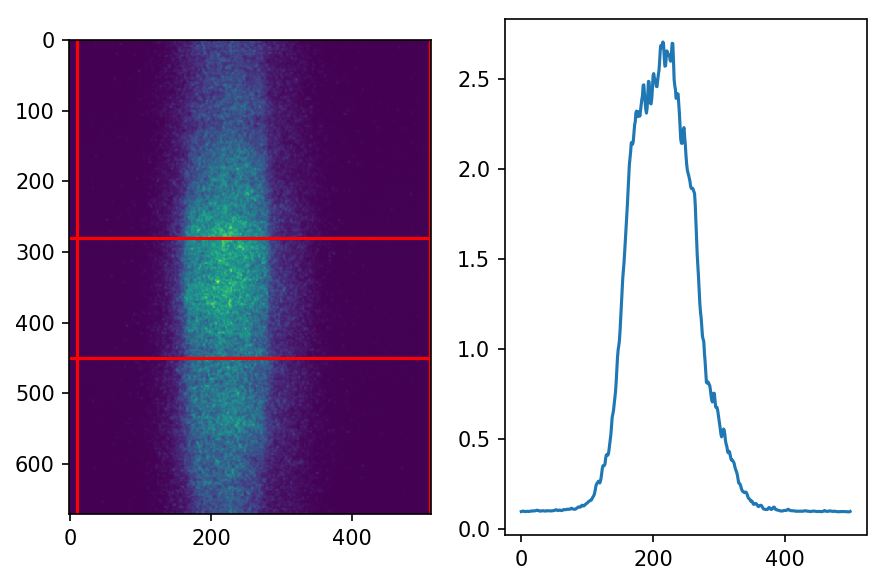

In [7]:
# test
image = im.T
fig, ax = plt.subplots(1, 2,dpi=150)

# full img
ax[0].imshow(image)
#boundaries idx
y1 = 280
y2 = 450
x1 = 10
x2 = 510
ax[0].axvline(x = x1, color='r')
ax[0].axvline(x = x2, color='r')
ax[0].axhline(y = y1, color='r')
ax[0].axhline(y = y2, color='r')


y1 = 450
y2 = 620
x1 = 10
x2 = 510
ROI_bounds = (x1,x2,y1,y2)

im_ROI = image[ROI_bounds[2]:ROI_bounds[3], ROI_bounds[0]:ROI_bounds[1]]
# ax[1].imshow(im_ROI)

profile_ROI = np.sum(im_ROI,axis=0)*1e-6
ax[1].plot(profile_ROI)

fig.tight_layout()

In [8]:
# test
# same game, moving window

image = im.T

image_cut = []
profile_cut = []

for k in np.arange(0,510, 10):
    #boundaries
    y1 = k
    y2 = k+170
    x1 = 10
    x2 = 510

    ROI_bounds = (x1,x2,y1,y2)

    im_ROI = image[ROI_bounds[2]:ROI_bounds[3], ROI_bounds[0]:ROI_bounds[1]]
    image_cut.append(im_ROI)
    
    profile_ROI = np.sum(im_ROI,axis=0)
    profile_cut.append(profile_ROI)
    


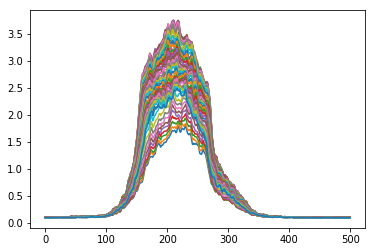

In [14]:
for k in range(len(profile_cut)):
    plt.plot(1e-6*profile_cut[k])

In [15]:
# test
# same game, moving window

image = im.T

image_cut = []
profile_cut = []

for k in np.arange(0,600, 10):
    #boundaries
    y1 = k
    y2 = k+100
    x1 = 10
    x2 = 510

    ROI_bounds = (x1,x2,y1,y2)

    im_ROI = image[ROI_bounds[2]:ROI_bounds[3], ROI_bounds[0]:ROI_bounds[1]]
    image_cut.append(im_ROI)
    
    profile_ROI = np.sum(im_ROI,axis=0)
    profile_cut.append(profile_ROI)
    


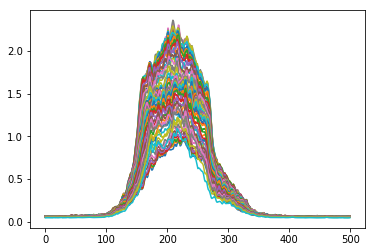

In [16]:
for k in range(len(profile_cut)):
    plt.plot(1e-6*profile_cut[k])

# Conclusion:

The use of the ROI changes dramatically the profile intensity. The presence of peaklets is also dependent on the window used.

For sure the max intensity changes. 10^7 for the full frame, ~10^6 for a 100 pixels wide frame.